# THIS STEP IS DONE TO FILTER OUT WHICH FEATURES ARE USEFUL

## ONCE YOU GET THE FEATURES, THEN YOU CAN DO YOUR TRAIN/TEST SPLIT

### THEN ON THE TRAIN DATA, DO VALIDATION OR CROSS-VALIDATION/VALIDATION TESTS
### TO SELECT THE BEST MODEL

# Intro to Regression

We're going through a few regression exercises that will help you see how regression works in Python.  

## Objectives: 
At the end of this notebook the students should:
- Be **able to visualize data**
- Look for **correlations** and **multicollinearity**
- **Understand** how **linear regression models** work
- Interpret basic regression statistics like **R^2**
- Do **basic feature engineering** and selection to improve models


Be able to create linear regression in:
- [***statsmodels***](http://statsmodels.sourceforge.net/): a package mainly best at doing regressions with traditional R formula syntax
- [***scikit-learn***](http://scikit-learn.org/dev/index.html): This is the main machine learning package we'll be using throughout the course.  It has a multitude of machine learning algorithms and helpful machine learning pipeline tools.  sklearn has a tremendous amount of functionality, to get the most out of this course it will help to really explore the depth of the documentation on your own and watch as you understand more and more of the functionality as the course progresses.


Gain familiarity with the following:
- [***R formulas***](http://science.nature.nps.gov/im/datamgmt/statistics/r/formulas/): R formulas are a convenient way for encapsulating functional relationships for regressions
- [***seaborn***](http://stanford.edu/~mwaskom/software/seaborn/): We'll use seaborn for **visualization** as we go along
- [***Variable Preprocessing and Polynomial Regression***](http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing) with scikit-learn:  We'll be **"standardizing"** or **"normalizing"** many of our variables to yield better model data.  We'll show how the "linear" models can be extended to basically any type of function by using functions of the different fields as the inputs to the linear model.

## Datasets
We'll take a look at a few different datasets:
1. [Survey Responses](http://www.ats.ucla.edu/stat/examples/chp/p054.txt) (done together)
2. Manufactured random dataset  (done together)
3. [Car price predictor dataset](https://archive.ics.uci.edu/ml/datasets/Automobile) (exercise done in pairs)

# Setup
Try running the following imports and check that they all import successfully.  If they do not, install commands are given below. If necessary, at a command line window use `pip` to install the ones that are failing for you and then retry the imports.

In [2]:
# Necessary imports
import pandas as pd
import numpy as np 
import statsmodels.api as sm               # This formula is the same as the one below
import statsmodels.formula.api as smf      # This formula is the same as the one above
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## Installations (if necessary)

```` bash
conda install pandas numpy statsmodels seaborn scikit-learn
````

# Survey Data
We will use this [simple survey data](http://www.ats.ucla.edu/stat/examples/chp/p054.txt) to demonstrate a few basic features of ***statsmodels*** and ***seaborn*** and how they might be used in a data science workflow for regression.

The dataset is simply the results of a survey where the question responses are all numeric.  This leads to 6 numeric independent variable (predictor) fields and 1 numeric dependent variable (response) field.  The predictors are labeled ***X<sub>i</sub>*** and the response is labeled ***Y***.

Let's load the dataset in using ***pandas*** and take a look at it.  Here we use [***pandas.read_table***](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) to load the data.

In [3]:
# Load data
df = pd.read_table('https://stats.idre.ucla.edu/wp-content/uploads/2016/02/p054.txt')

# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Y      30 non-null int64
X1     30 non-null int64
X2     30 non-null int64
X3     30 non-null int64
X4     30 non-null int64
X5     30 non-null int64
X6     30 non-null int64
dtypes: int64(7)
memory usage: 1.8 KB


In [4]:
# Take a look at the first few rows
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


If we look at the column names, we'll notice we have the trailing whitespace problem.

In [5]:
# Very important to look at columns because there might be whitespaces
df.columns

Index(['Y ', 'X1 ', 'X2 ', 'X3 ', 'X4 ', 'X5 ', 'X6 '], dtype='object')

We can remove this by calling map on the columns list and stripping the whitespace with strip.  The ***map*** function is applied to Series objects, whereas the ***apply*** and ***applymap*** functions are called on Dataframes.

In [6]:
df.columns = df.columns.map(str.strip) # code to remove whitespace

# .map is a function to apply a function onto ALL the variables
# We use map here because df.columns is a Series. If it is a dataframe, we will use .apply or .applymap instead.

df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [7]:
# If you want to use a function to apply to all the variables in a dataframe, use .apply()

In [8]:
# How many rows and columns does the dataset have?
df.shape   # But this can be seen in df.info() too.

(30, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Y     30 non-null int64
X1    30 non-null int64
X2    30 non-null int64
X3    30 non-null int64
X4    30 non-null int64
X5    30 non-null int64
X6    30 non-null int64
dtypes: int64(7)
memory usage: 1.8 KB


In [10]:
# After we upload the data, it is very common to do some EDA!!

### Visualizing with Seaborn
We see that the data has 30 responses with 7 fields (6 independent, 1 dependent) each.  Let's use pandas to check out the correlations between the different variables.

#### Viewng the Correlations with `.corr()`

In [11]:
# View the correlations
df.corr()

# The diagonals are 1. Because the coorelation between itself is 1.

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.825418,0.426117,0.623678,0.590139,0.156439,0.155086
X1,0.825418,1.000000,0.558288,0.596736,0.669197,0.187714,0.224580
X2,0.426117,0.558288,1.000000,0.493331,0.445478,0.147233,0.343293
X3,0.623678,0.596736,0.493331,1.000000,0.640314,0.115965,0.531620
X4,0.590139,0.669197,0.445478,0.640314,1.000000,0.376883,0.574186
X5,0.156439,0.187714,0.147233,0.115965,0.376883,1.000000,0.283343
X6,0.155086,0.224580,0.343293,0.531620,0.574186,0.283343,1.000000


#### Better Visualization (As opposed to just eyeballing the numbers, which is difficult), we use a `heatmap` to do so!

A Heatmap is a great way to visualize this table!!  
  
How do we improve this heatmap? Can we change the colours?

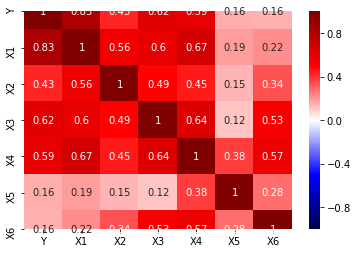

In [12]:
# example of a better corr matrix
sns.heatmap(data=df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1); 
# annot param lets you put values onto the heatmap
# vmin param sets the lower range of the heatmap, otherwise they are inferred from the data
# vmax param sets the upper range of the heatmap, otherwise they are inferred from the data

# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

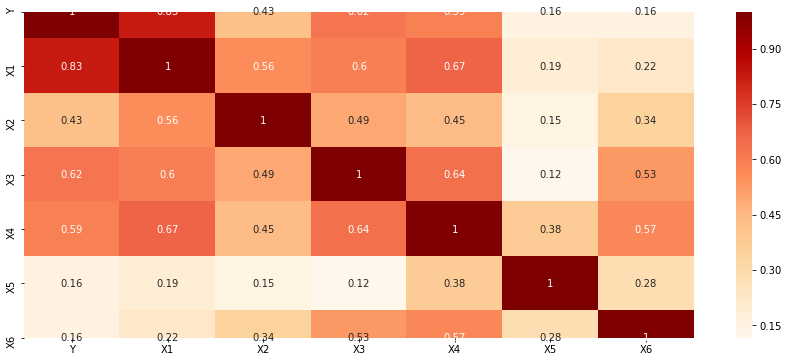

In [13]:
# Utilizing a different color and playing with the size of the heatmap

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(data=df.corr(), cmap='OrRd',annot=True);

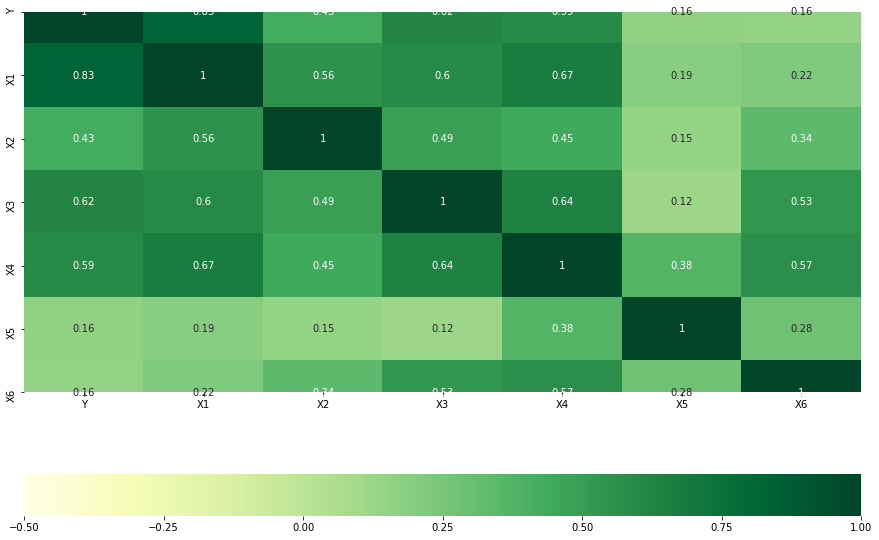

In [14]:
# Utilizing a different color, playing with the size of the heatmap and the position of the color bar

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, cmap='YlGn',vmin=-.5,vmax=1,ax=ax,cbar_kws={'orientation':'horizontal'})

# However, a vertical one will look just nice

In [15]:
# From the graph above, we can see that X1 and Y have a high correlation.

I honestly think Green is the best color for heatmaps. Especially since we want to give off the idea that:  
  
High Correlation = Good

### Correlation and Multicollinearity
We notice that some of the **variables are highly correlated**.  This is something we might want to take into consideration later.  
  
When 2 **predictor variables** are **highly correlated** this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to **watch out for as it can destabilize our model**.  
  
In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.


> Why do you want to put 2 variables that explain the same thing into the same model anyway? There is absolutely no advantage in putting variables that are collinear.

The other takeaway from this table is that some of our predictors are highly correlated with our ***target variable Y***.  

> Y is very highly correlated with X1.  
> X5 and X6 is not very highly correlated with Y. (However, this doesn't mean that it is useless. It might give you a different trend! And you never know - by adding in X5 and X6, you may be able to improve your model)
  
  This is a good thing, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

Let's try to visualize these correlations all together by using the [***seaborn pairplot***](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function.

> What do you notice?  
> Almost all correlations are positive, somewhat normal distributions, etc.

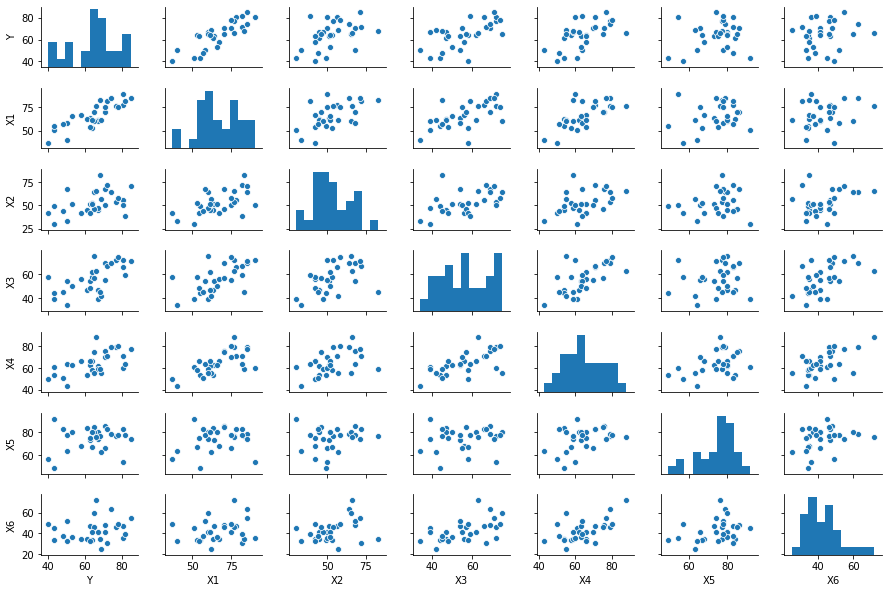

In [16]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.2, aspect=1.5);

# Please remember you NEVER want to do a pairplot if you have a lot of variables in your dataset
# This set of graphs can complement your heatmap as per above

### Ordinary Least Squares Regression with Statsmodels
Now that we have a feel for our data, let's jump right in and try a basic regression model.  

#### Statsmodels
We are going to use the [**`statsmodels`**](http://statsmodels.sourceforge.net/) library first.  `statsmodels` is a Python package for implementing [**linear models**](https://en.wikipedia.org/wiki/Linear_model), of which **Linear Regression** is one.  It has a bunch of nice features for evaluating and executing such models.  
  
Essentially, a linear model is one that is a **linear function of the parameters**.  For Linear Regression, this means the parameter $\beta$ (note that here $\beta$ is a **vector** of parameters, which includes $\beta_0$, $\beta_1$, $\beta_2$, etc).  We'll discuss linear models generally later but for  now just accept that Linear Regression is one of these.

#### Modeling with Statsmodels
There are **2 main ways** you can generate models with stats models:
- Via the `statsmodels.api` package
- Via the `statsmodels.formula.api` package

For both approaches, you'll need somewhere to use the [R formula](http://science.nature.nps.gov/im/datamgmt/statistics/r/formulas/) styles formulas for defining the relationship between target variable and feature variables in your model.  ***Statsmodels*** uses [***patsy***](http://patsy.readthedocs.org/en/latest/) to convert this syntax into the proper data matrices for input into its linear models under the covers.  There are a variety of interactions and functions of variables that you can incorporate with this syntax, so feel free to check out the docs.

Here we'll just start by defining a regression model that takes as its inputs each of the 6 predictor variables.  The other parameter of course is the data that the model is to be built from, our pandas dataframe.

This first model fitting is done for you, it fits a multiple linear regression model of the following form (notice the use of [MathJax](https://www.mathjax.org/) for rendering such lovely math equations in markdown):

$$
\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6
$$

##### `statsmodels.api`
To use this method, you need to generate a **matrix** of **features**, **`X`** and a **vector** of **targets**, **`y`** where each row represents a single **observation**.  In statsmodels, you can do this with a call to **`patsy.dmatrices`**:


In [17]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df, return_type="dataframe") 

# y and X are dataframes
# Statsmods builds your model in a very R-like way.

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           1.24e-05
Time:                        06:09:19   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.362     -13.187      34.761
X1             0.6132      0.161      3.809      0.001       0.280       0.946
X2            -0.0731      0.136     -0.538      0.596      -0.354       0.208
X3             0.3203      0.169      1.901      0.070      -0.028       0.669
X4             0.0817      0.221      0.369      0.715      -0.376       0.540
X5             0.0384      0.147      0.261      0.796      -0.266       0.342
X6            -0.2171      0.178     -1.218      0.236      -0.586       0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### `statsmodels.formula.api`
The formula approach handles the creation of the `X` and `y` matrices internally, so all you have to do is supply the R formula for your model when you create your `ols` object.  

**NOTE:** We'll use this for the remainder of these exercises, but many people like to stick with the `dmatrices` and `X`, `y` matrix creation approach because that is the way `sklearn` works (see later).  Notice that here we've built the same model and it's deterministic, so the results are the same.

[Nonrobust vs. robust regression](https://en.wikipedia.org/wiki/Robust_regression#Methods_for_robust_regression)

In [18]:
# Define the model
lm1 = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           1.24e-05
Time:                        06:09:19   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.362     -13.187      34.761
X1             0.6132      0.161      3.809      0.001       0.280       0.946
X2            -0.0731      0.136     -0.538      0.596      -0.354       0.208
X3             0.3203      0.169      1.901      0.070      -0.028       0.669
X4             0.0817      0.221      0.369      0.715      -0.376       0.540
X5             0.0384      0.147      0.261      0.796      -0.266       0.342
X6            -0.2171      0.178     -1.218      0.236      -0.586       0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Interview question:
# Can you explain to me what R square is? It is the amount of variance explained by the model. 
# THe amount of information exlpained by the model

## Regression Statistics  (VERY IMPORTANT)
From this we get a handful of useful statistics describing our regression. A google search on statistics should yield details for those interested, and we will cover them in depth soon. We will focus on the ***R<sup>2</sup>*** values and the middle table here.

***R<sup>2</sup>*** is:
* the square of the correlation coefficient 
* and represents the estimated percentage of the variance in our target variable ***Y*** that can be explained by our regression model.  
  
***Adjusted R<sup>2</sup>*** also penalizes for things such as large coefficients and extra variables to try and limit ***overfitting*** so it is **often a better measure of model efficacy**. We will use that here.

The middle table provides the **coefficients** that are regression has found, along with the **standard error** for each coefficient. This defines our model, aka these are the model parameters that our algorithm was seeking to determine.  

The **t-scores** are values that the coefficients score in the [Student's T Distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) and the **P>|t|** field represents the probability of finding such a t-score if the actual value of the coefficient were 0. In other words, if we had a coefficient whose true value should be 0 (aka the predictor has no impact on the response) then this P-value is the probability of finding such a coefficient value in our regression by random chance. In essence, it measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.

In [20]:
# the t-value is the number of the test.
# search on wiki. t is some kind of formula. Some value that we see here is the result of the formula
# the P value is what you're loooking out for. If it's < 0.05 then you can reject this.

## Exercise

Putting it all together, the final column returns a **95% Confidence Interval** for the value of each coefficient.

Given these stats, lets remove the highest 3 P-values from our regression model, from ***X<sub>2</sub>***, ***X<sub>4</sub>***, and ***X<sub>5</sub>*** and see how our model performs now:

In [21]:
# STUDENT SECTION
# Define the model removing X2, X4, and X5

# Step1: Initialize the model. And also input the values required (statsmodels)
lm2 = smf.ols("Y ~ X1 + X3 + X6", data=df)  

# A better way, or rather, another way of doing it is to...

# Do this dropping sequentially. 
# Start with X2, then check for R2
# Then drop the next X with a high P value/coefficient
# Then continue dropping until you get a good model


# Step2: Fit (train) the model
fit2 = lm2.fit()

# Step3: Check for Accuracy/Efficacy of Model
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     22.92
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           1.81e-07
Time:                        06:09:20   Log-Likelihood:                -97.638
No. Observations:                  30   AIC:                             203.3
Df Residuals:                      26   BIC:                             208.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5777      7.544      1.800      0.084      -1.929      29.084
X1             0.6227      0.118      5.271      0.000       0.380       0.866
X3             0.3124      0.154      2.026      0.053      -0.005       0.629
X6            -0.1870      0.145     -1.291      0.208      -0.485       0.111
==============================================================================
Omnibus:                        2.856   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                1.394
Skew:                          -0.121   Prob(JB):                        0.498
Kurtosis:                       1.972   Cond. No.                         605.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You should see our **Adjusted R<sup>2</sup>** has increased, and our P-values are lower so we likely have a better model.  Let's just try removing ***X<sub>6</sub>*** to see if that might improve our model a little bit more.

In [22]:
# Maybe you want to drop variables sequentially instead. 

In [23]:
# Dropping the next highest P value, X6

# Step1: Initialize the model. (And also input the target and variables in statsmodel)
lm3 = smf.ols("Y ~ X1 + X3",data=df)

# Step2: Fit (train) the model.
fit3 = lm3.fit()

# Step3: Review the Accuracy/Summary/Efficacy of the model
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     32.74
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           6.06e-08
Time:                        06:09:20   Log-Likelihood:                -98.569
No. Observations:                  30   AIC:                             203.1
Df Residuals:                      27   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8709      7.061      1.398      0.174      -4.618      24.359
X1             0.6435      0.118      5.432      0.000       0.400       0.887
X3             0.2112      0.134      1.571      0.128      -0.065       0.487
==============================================================================
Omnibus:                        6.448   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                1.959
Skew:                          -0.041   Prob(JB):                        0.375
Kurtosis:                       1.751   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# What did we discover?

Nope, both **R<sup>2</sup>** coefficients (R-squared and adjusted R-squared), decreased so lets stick with the 2nd model.

### Plotting Residuals
Before we call it a day with this model and dataset, let's take a quick look at a plot of our residuals *(actual value - predicted value)* with this model.  We do this because in a good model we essentially want our errors to be random.  If our residuals look systematic (e.g. missing high for one range and low for another) then we probably are missing the actual functional dependency underlying the data (perhaps it's not really linear).

Take a look [here](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) for an example of a bad residual plot.

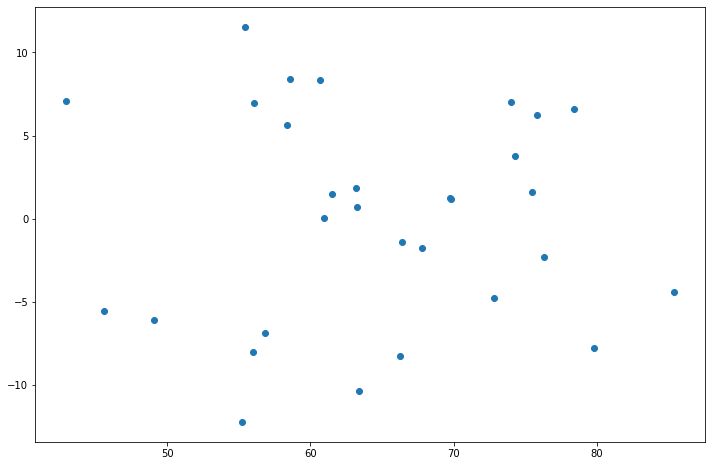

In [25]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid);

This looks pretty random! Let's move on to modeling functions with sklearn!

# Regression with sklearn
Statsmodels has decent functionality for linear models, and is great for statistical summaries. But, scikit-learn has more modeling options for all sorts of algorithms as well as data preparation and is growing every day, so we will generally be working with that from here on.

### Regression with sklearn
Before we jump into some of the additional features of sklearn, let's try to repeat our basic survey example using sklearn's built in **LinearRegression**.

You should still have your Dataframe loaded from earlier.  Let's try repeating some of the different models we tried earlier with sklearn.  Here's the first model:

In [26]:
# Step 1: Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df.iloc[:, 1:]

# Choose the response variable(s)
y = df.iloc[:, 0]

# Step 2: Fit the model to the full dataset
lr.fit(X, y)

# Step 3: Print out the R^2 for the model against the full dataset
lr.score(X,y)  # Returns you the R**2 coefficient determination of the prediction

0.7326019925311491

You'll notice that this is the same **R<sup>2</sup>** value that was reported for the first model above. 

## Exercise
Let's quickly run the best model from earlier (***X1***, ***X3***, and ***X6***) and see how it performs.

In [27]:
# STUDENT SECTION
# Create an empty model
lr1 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X3 + X6 model
X = df.iloc[:, [1,3,6]]   # X = df[['X1', 'X3', 'X6']]

# Choose the response variable(s)
y = df.iloc[:, 0] # y = df['Y']

# Fit the model to the full dataset
lr1.fit(X,y)  

# Print out the R^2 for the model against the full dataset
r_squared = lr1.score(X,y)
r_squared

# Note:  adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7255949995745075

In [28]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.6939328841407968

In [30]:
## FOr machine Learning methodology, sklearn

# Split your data into training and testing sets!!

Notice that the **R<sup>2</sup>** value is the same again.  It's slightly lower, the same as we saw earlier, but the **Adjusted R<sup>2</sup>** value that we saw earlier was higher for this one.  

So we've seen how can do simple models with statsmodels and sklearn, but does anyone see an issue with what we've done here?  What data have we fit and scored our models on?  What claims can we make about the probable performance of our model going forward?

## sklearn: What's in a model?
Essentially all models in `sklearn` inherit from the same type of "estimator" interface.  This means they'll share common methods that we'll see over and over again like:
- `fit()`: Fit a model to a set of training data
- `score()`: Score the performance of a model on a given sample of data with known _ground truth_ dependent variables
- `predict()`: Predict target/response variables based on a sample of independent variables (features, predictors, etc)

Additionally, models are usually loaded with other goodies once they've been fit, which can provide information about the resulting fitted model.  For instance, the following might be of interest in regression:
- `intercept_`: our $\beta_0$ intercept in our regression model
- `coef_`: the other $\beta$s in our model

## Exercise
Let's print those out:

In [31]:
# STUDENT SECTION
# print out intercept
print(lr.intercept_)

# print out other coefficients
lr.coef_

# note how much more elegant statsmodel renders results; yet, sklearn's raw values are easier to capture

10.787076385709774


array([ 0.61318761, -0.07305014,  0.32033212,  0.08173213,  0.03838145,
       -0.21705668])

##### Pickling for Later
We're going to come back to this dataset!  So let's pickle it away for later...

`sklearn`, `pandas` and `statsmodels` have their own respective methods for "pickling" their objects.

**Pandas:**

To pickle a `pandas.DataFrame` use the [`to_pickle()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) method.  Use this now to pickle your training data `df` now.

In [32]:
# Pickle your pandas dataframe
df.to_pickle('data/survey_data.pkl')

**Statsmodels**

To pickle a statsmodels object us the [`save()`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLSResults.save.html#statsmodels.regression.linear_model.OLSResults.save) method.  Use this to pickle your best fit model `fit2` to `survey_sm_model.pkl` now.

In [33]:
# Pickle fit2 to a file 
fit2.save('data/survey_sm_model.pkl')

**sklearn**

Pickle an `sklearn` model to the file `survey_sk_model.pkl` using the `sklearn` replacement for pickle `joblib` as seen [here](http://scikit-learn.org/stable/modules/model_persistence.html).

In [34]:
from sklearn.externals import joblib
joblib.dump(lr, 'data/survey_sk_model.pkl')

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['data/survey_sk_model.pkl']

In [35]:
# Linear regression
When we say linear, we are referring to the coefficient.

y = beta0 + beta1 * x1       # Linear
y = (B1X1) / (B0 + X1)       # non-linear

# Polynomial Regression
y = B0 + B1 * (X1 ** 2)      

SyntaxError: invalid syntax (<ipython-input-35-109411648a21>, line 2)

# Polynomial Regression
So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

## Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  We'll combine this with the [***make_pipeline***](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

### Generating Random Data
The first thing we're going to do is manufacture some data from a known distribution with a little additive noise.  This allows us to compare our results to the known ground truth.  Let's create that data from a sine curve as follows:

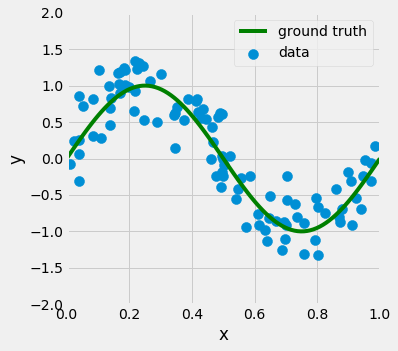

In [36]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend();

## Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We first define a function `plot_approximation` that takes a pipeline of steps from make_pipeline and some plotting info and will plot the results of the sklearn pipeline on the specified plot with the ground truth and data in the background.

In [37]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

Now let's generate our pipeline for a 3rd degree polynomial and try it out in our plotting function.  Note that the steps are:
- Use PolynomialFeatures(3) to create a generator of 3rd degree polynomials
- Feed this generator to make_pipeline along with a LinearRegression object to tell it to string together these operations when given a new set of input predictor variables.  This results in a new model object that has the same `fit()`, `score()`, `predict()`, etc functions
- Call `fit()` on our new object to fit a 3rd degree polynomial regression
- Send the result to our plotting function to view the results

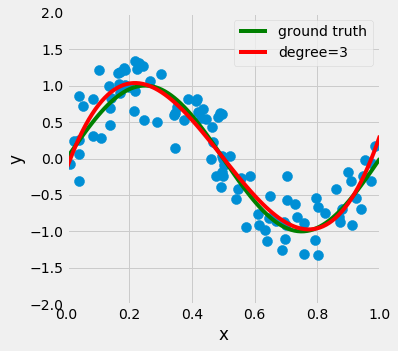

In [38]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 3

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())  # make_pipline is like piping an output of something into another function 


# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

> How would you characterize this fit?

Plot the fit of a polynomial of degree 2:

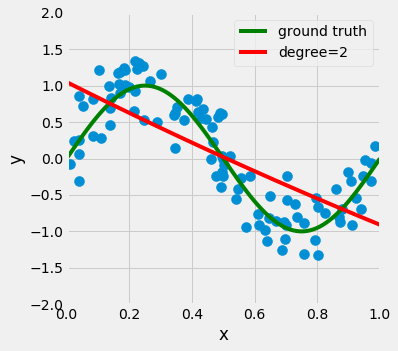

In [39]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

Plot the fit of a polynomial of degree 9, or heck, how bout 27!?:

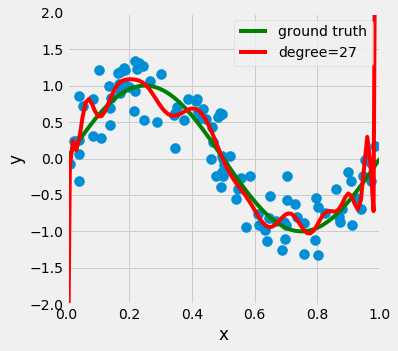

In [40]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 27
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

In [41]:
# This is overfitting. 

> What happens as we increase the degree of polynomial?

> Which polynomial should we choose?

To gain some insight into this, let's plot polynomials from degree 1 to 9 and examine how the errors in our predictions change vs. the training and test sets.

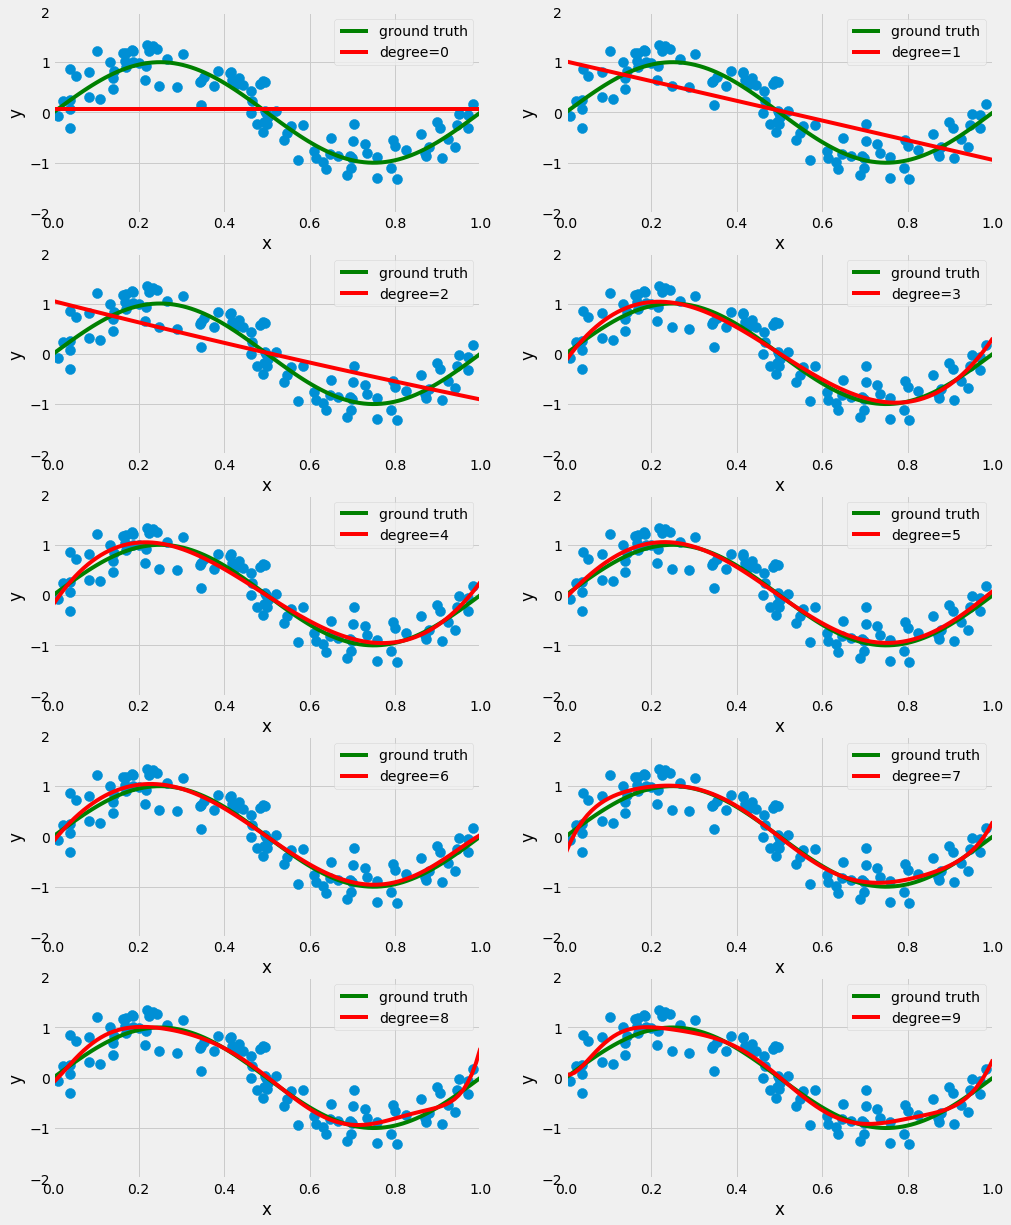

In [42]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax_rows = plt.subplots(5, 2, figsize=(15, 20))
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

> What do you notice?  
> The more we increase the degrees, the more it starts snaking

### Pickling for later
We may return to this fake data for further exploration later, so let's pickle our `X` and `y` so we can do just that.  To save `numpy` arrays, you use the [`numpy.save()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.save.html) method.  We can save multiple arrays to one file with the [`numpy.savez()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.savez.html) method.  Use this now to save `X` and `y` to the file `poly_data.npz`.

In [43]:
# Pickle the numpy arrays X and y
np.savez('data/poly_data.npz', X, y)

# Exercises: Car Price Predictor Dataset
For these exercises we'll be exploring the auto data available [here](https://archive.ics.uci.edu/ml/datasets/Automobile).  The goal is to be able to predict auto price from the 

## Data Exploration
Use pandas `read_csv()` to load the data into a dataframe and then call `head()` to make sure everything looks good.

In [44]:
# read in the car dataset
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=None)

columns= ['symboling','normalized-losses','make',
          'fuel-type','aspiration','num-of-doors',
          'body-style','drive-wheels','engine-location',
          'wheel-base','length','width','height','curb-weight',
          'engine-type','num-of-cylinders','engine-size','fuel-system',
          'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=columns
# Use head to view the first few rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Exercise

Use [`shape`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html#pandas.DataFrame.shape) to check out how many rows and columns the dataframe has.

In [45]:
# STUDENT SECTION
# How many rows and columns do we have? 
df.shape

(205, 26)

Use [`info()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html#pandas.DataFrame.info) to get a summary of the dataframe and its datatypes

In [46]:
# STUDENT SECTION
# Let's examine the datatypes
df.info()

# WHen you see the "object" datatype - you can assume they are strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

**Lets keep numeric data ** 
- Create a list of columns to keep
- Select out only those columns from the dataframe and reassign the dataframe to that selection
- Use `head()` & `info()` to make sure everything worked as expected

In [47]:
# Create a list of columns to keep.  These are the numeric columns.
subset=['wheel-base','length','width','height','curb-weight',
        'engine-size','bore','stroke','compression-ratio',
        'horsepower','peak-rpm','city-mpg','highway-mpg','price']

# Now create a new dataframe named cars that only contains your column subset.
cars = df[subset]

It looks like some of our features (even our target feature :'price') is listed as an object.    
Run cars.head(10), and we will see why!  

In [48]:
# check data head
cars.head(10)

# When they created this dataset, they chose to use "?" to represent NaN

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,?


In [63]:
# STUDENT SECTION : replace "?" data in order to turn our features into numerics

objects=['bore','stroke','horsepower','peak-rpm','price']
for o in objects:
    cars[o] = cars[o].replace('?',np.nan)
    cars[o] = cars[o].astype(float)
cars.head(10)

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


We can see from the above output, that only a few entries were unknown in the first place.  

## Since we do not know naything about what nan is, we just decide to drop the row entirely
To keep things simple for now, let's just go ahead and drop the entries that were unknown: 


In [64]:
# drop nulls
cars=cars.dropna()
len(cars)

195

Before we begin modeling, use the [`corr()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html#pandas.DataFrame.corr) function to get a feel for the correlations among the different variables, especially with regard to 'price'.

In [65]:
# build correlations
cars.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
height,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746
compression-ratio,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500
horsepower,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027


Take a look at only the 'price' column of the correlations and order it in descending order wih [`sort_values()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)

In [66]:
# STUDENT SECTION
# Get the correlations with 'price' sorted in descending order
cars.corr()['price'].sort_values(ascending=False)

# From this, we can see that engine-size has the highest correlation with price
# Height and stroke has very low correlation with price
# There is a good chance that when I build my model, I will remove height and stroke

price                1.000000
engine_size          0.888942
curb_weight          0.835729
horsepower           0.811027
width                0.754273
length               0.695331
wheel_base           0.585793
bore                 0.546873
height               0.138291
stroke               0.093746
compression-ratio    0.069500
peak-rpm            -0.104333
city-mpg            -0.702685
highway-mpg         -0.715590
Name: price, dtype: float64

You should now have a better feel for which variables might be most valuable for your model.
Q :  Do correlations provide the 'entire picture' of what is happening with our model?  
  
**A:  Nope.** It can give us an idea : but corrs will only provide the relationship with the response variable (all other factors being held constant) 

Now use ***seaborn's*** `pairplot()` function to visualize these correlations for the variables.  What do you think of our distributions?

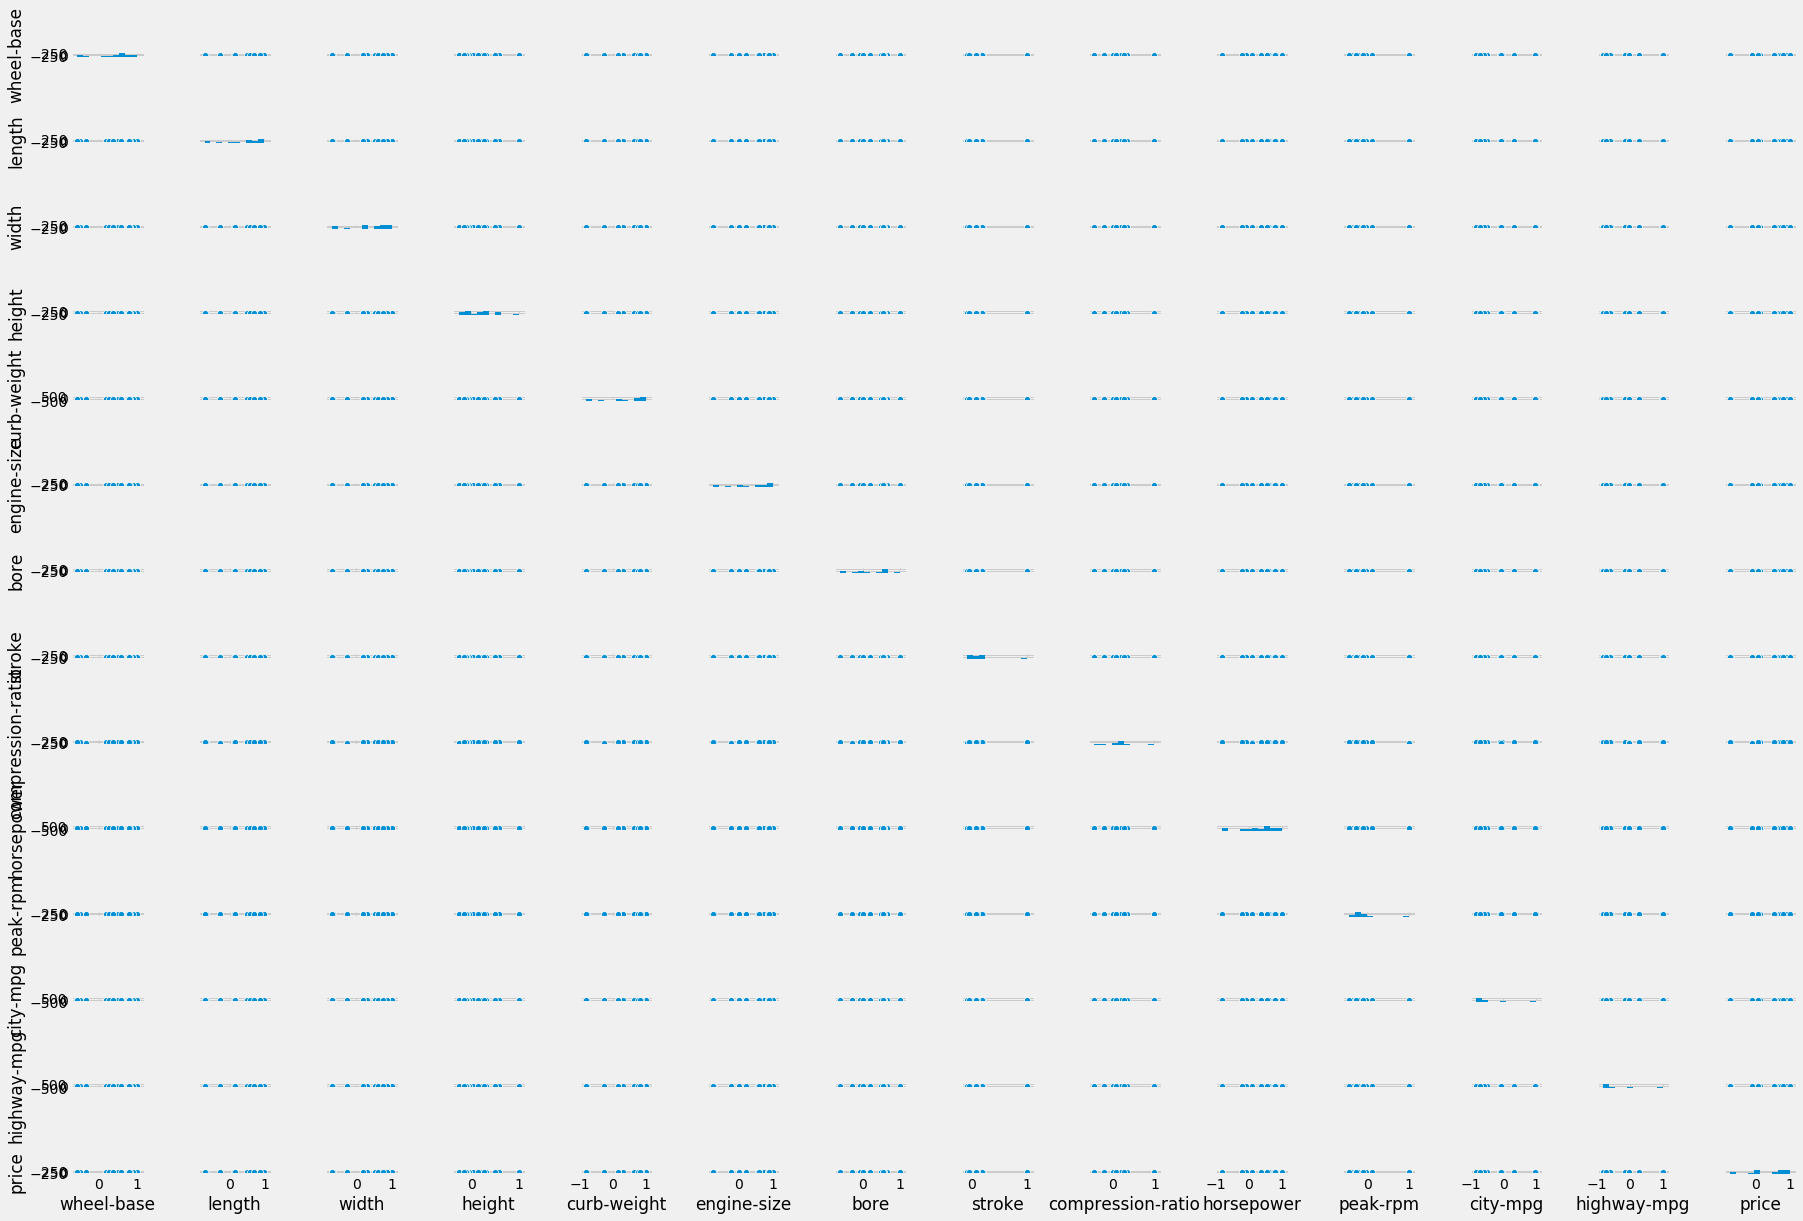

In [53]:
# STUDENT SECTION
#Let's try visualizing some of these pairwise correlations with seaborn.  Hint: Look at a subset of the columns.
# sns.pairplot(, height=1.2, aspect=1.5);

sns.pairplot(cars.corr(),height=1.2,aspect=1.5)  
# This is way too long. Therefore, we change to the correlations that we think have some significant impact on our model.

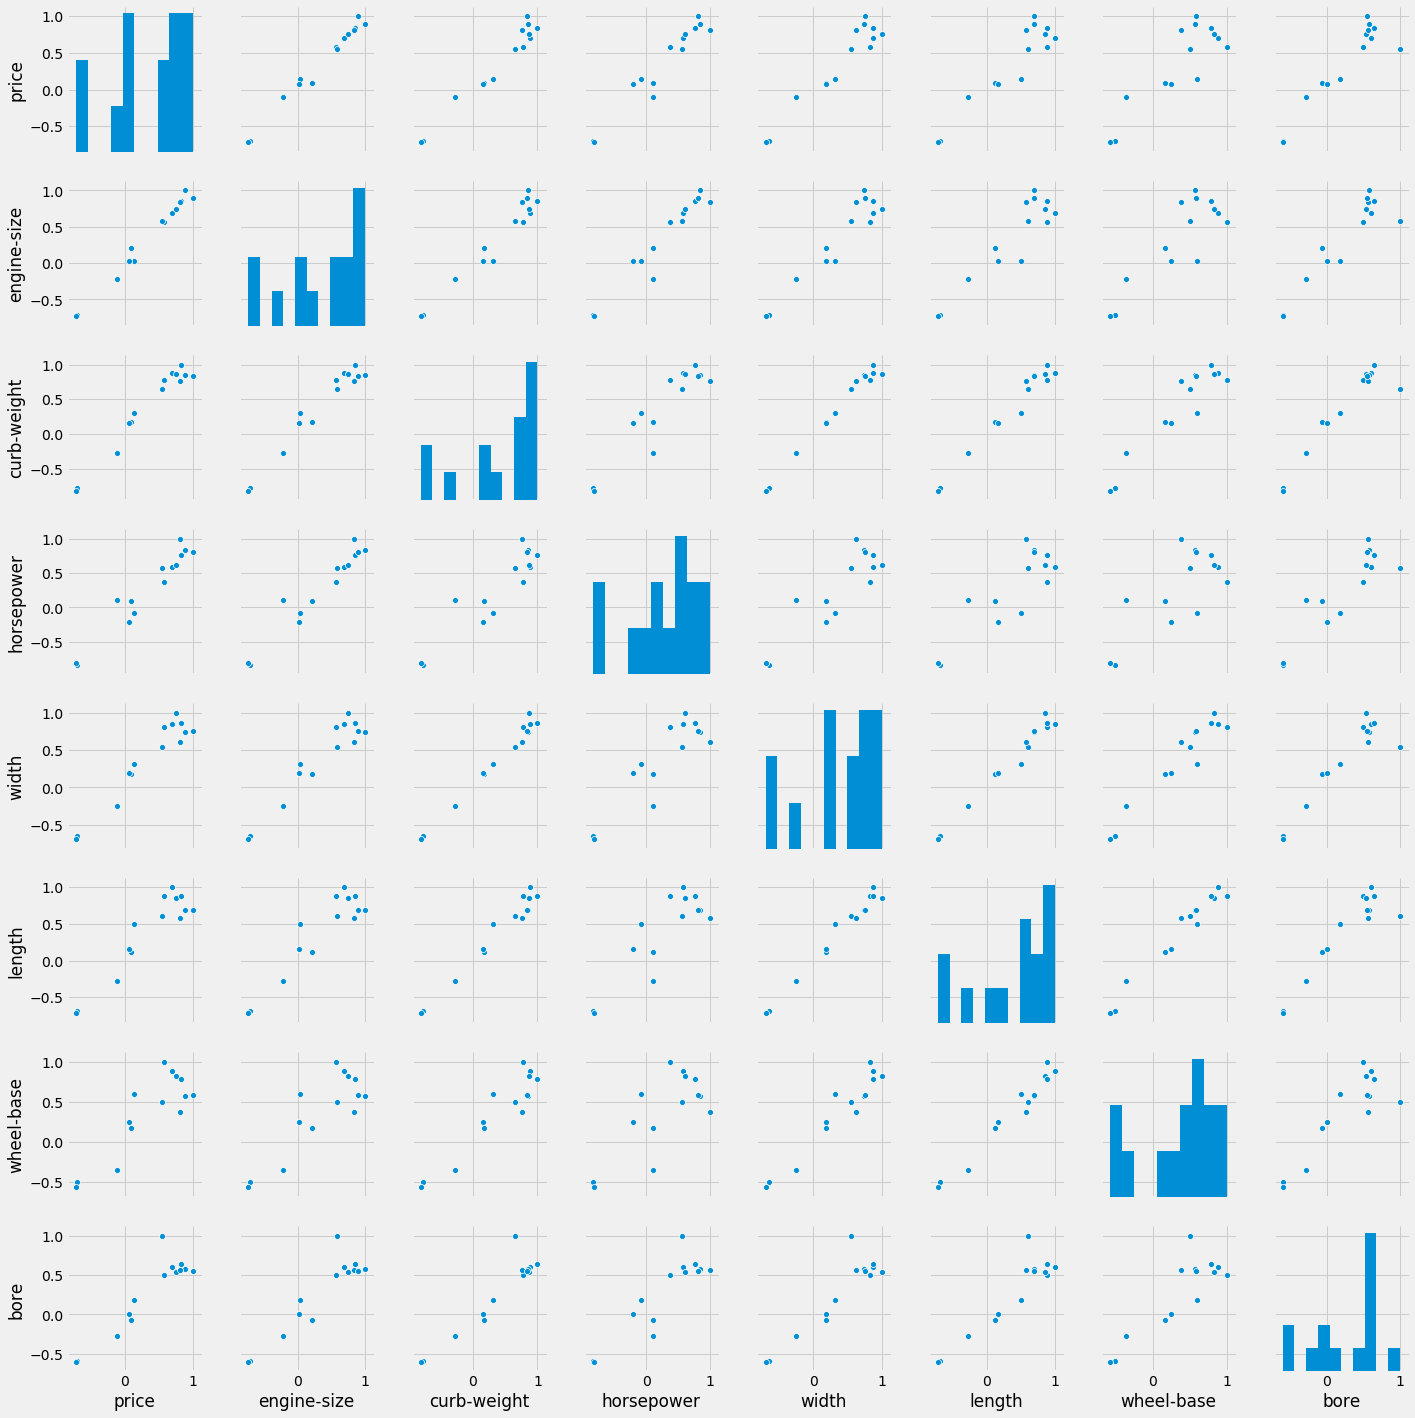

In [56]:
sns.pairplot(cars.corr()[['price','engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'wheel-base','bore']]);

# A common treatment for skewed data is to apply natural log on it

## Exercise: Modeling with statsmodels
Let's try some exploration with statsmodels.  As a first model, try creating an ordinary least squares model with statsmodels by incorporating all of the variables that had at least a .10 absolute value of correlation with cnt above 
- Create your model with the `ols()` function with the appropriate **R Formula** syntax and your dataframe
- Fit the model
- Print the fit summary to check out the results

In [67]:
# STUDENT SECTION
# Let's jump right in and try a model with statsmodels using all variables above .10 correlation
# lsm = smf.ols('price~ ....', data = cars)

# You might have issues with some of the features .. Fix that
## ex:
cars.rename(
    inplace=True,
    columns={
        "curb-weight": "curb_weight",
        'engine-size': 'engine_size',
        'wheel-base': 'wheel_base'
    })

# this also works
#cars.rename(columns=lambda name: name.replace("-", "_"), inplace=True)

cars.head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [74]:
# fit and summarize in statsmodels
lsm = smf.ols('price ~ engine_size + curb_weight + horsepower + width + length + wheel_base + bore + height', data=cars)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     116.7
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.58e-68
Time:                        06:18:10   Log-Likelihood:                -1855.0
No. Observations:                 195   AIC:                             3728.
Df Residuals:                     186   BIC:                             3758.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.223e+04    1.5e+04     -4.156      0.000   -9.18e+04   -3.27e+04
engine_size   106.1209     14.491      7.323      0.000      77.533     134.708
curb_weight     1.4428      1.569      0.919      0.359      -1.653       4.539
horsepower     54.3878     14.006      3.883      0.000      26.757      82.018
width         727.7879    269.390      2.702      0.008     196.335    1259.240
length        -62.8537     57.610     -1.091      0.277    -176.508      50.800
wheel_base    -26.7726    105.535     -0.254      0.800    -234.971     181.426
bore        -1052.7197   1195.627     -0.880      0.380   -3411.453    1306.013
height        403.8097    148.924      2.712      0.007     110.011     697.608
==============================================================================
Omnibus:                       26.207   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.330
Skew:                           0.547   Prob(JB):                     1.45e-15
Kurtosis:                       5.686   Cond. No.                     1.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Seaborn for Exploring Distributions
Your **R<sup>2</sup>** should be .834, not bad.  That means we believe we can explain about 83.4% of the variance in price with this model.  

One thing we will be discussing next week is Linear Regression assumptions and one being: normal distribution of the predictor variable.  Perhaps you noticed from our pairplot above that our 'price' variable is skewed.  Transform the y variable and rerun your OLS model.  Are there any other variables we should transform, why? 


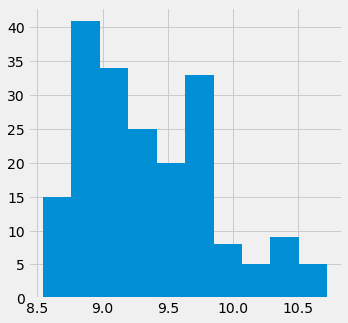

In [85]:
# take log of price as target and graph.  Call this log_price.

cars['log_price']=np.log(cars.price)
# looks better
cars.log_price.hist();

In [86]:
# refit and summarize
cars.corr()['log_price'].sort_values(ascending=False)

log_price            1.000000
price                0.957443
curb_weight          0.894720
engine_log           0.886122
engine_size          0.852747
horsepower           0.833171
width                0.801630
length               0.783528
wheel_base           0.640868
bore                 0.609647
height               0.193275
stroke               0.109640
compression-ratio    0.089332
peak-rpm            -0.116834
city-mpg            -0.785839
highway-mpg         -0.789156
Name: log_price, dtype: float64

In [87]:
# log-transform the engine size.  Call this new column log_engine_size.
cars['engine_log']=np.log(cars.engine_size)

In [88]:
# we see that the transformed engize-size values have a stronger correlation
cars.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine_log,log_price
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793,0.600268,0.640868
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331,0.744928,0.783528
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273,0.773738,0.801630
height,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291,0.069831,0.193275
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729,0.894278,0.894720
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942,0.977914,0.852747
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873,0.650880,0.609647
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746,0.234151,0.109640
compression-ratio,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500,0.041294,0.089332
horsepower,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027,0.860746,0.833171


In [89]:
# adjust model to improve R^2
lsm = smf.ols('log_price~ engine_log + curb_weight +horsepower + width + length + wheel_base + bore + height', data = cars)
fit3 = lsm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           7.04e-78
Time:                        06:55:02   Log-Likelihood:                 53.758
No. Observations:                 195   AIC:                            -89.52
Df Residuals:                     186   BIC:                            -60.06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2452      0.993      3.268      0.001       1.286       5.204
engine_log      0.3490      0.147      2.370      0.019       0.059       0.640
curb_weight     0.0003   9.04e-05      3.437      0.001       0.000       0.000
horsepower      0.0044      0.001      5.567      0.000       0.003       0.006
width           0.0392      0.015      2.592      0.010       0.009       0.069
length          0.0027      0.003      0.838      0.403      -0.004       0.009
wheel_base     -0.0063      0.006     -1.067      0.287      -0.018       0.005
bore           -0.0239      0.068     -0.350      0.727      -0.158       0.111
height          0.0153      0.008      1.824      0.070      -0.001       0.032
==============================================================================
Omnibus:                       12.306   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.402
Skew:                           0.527   Prob(JB):                      0.00123
Kurtosis:                       3.734   Cond. No.                     1.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

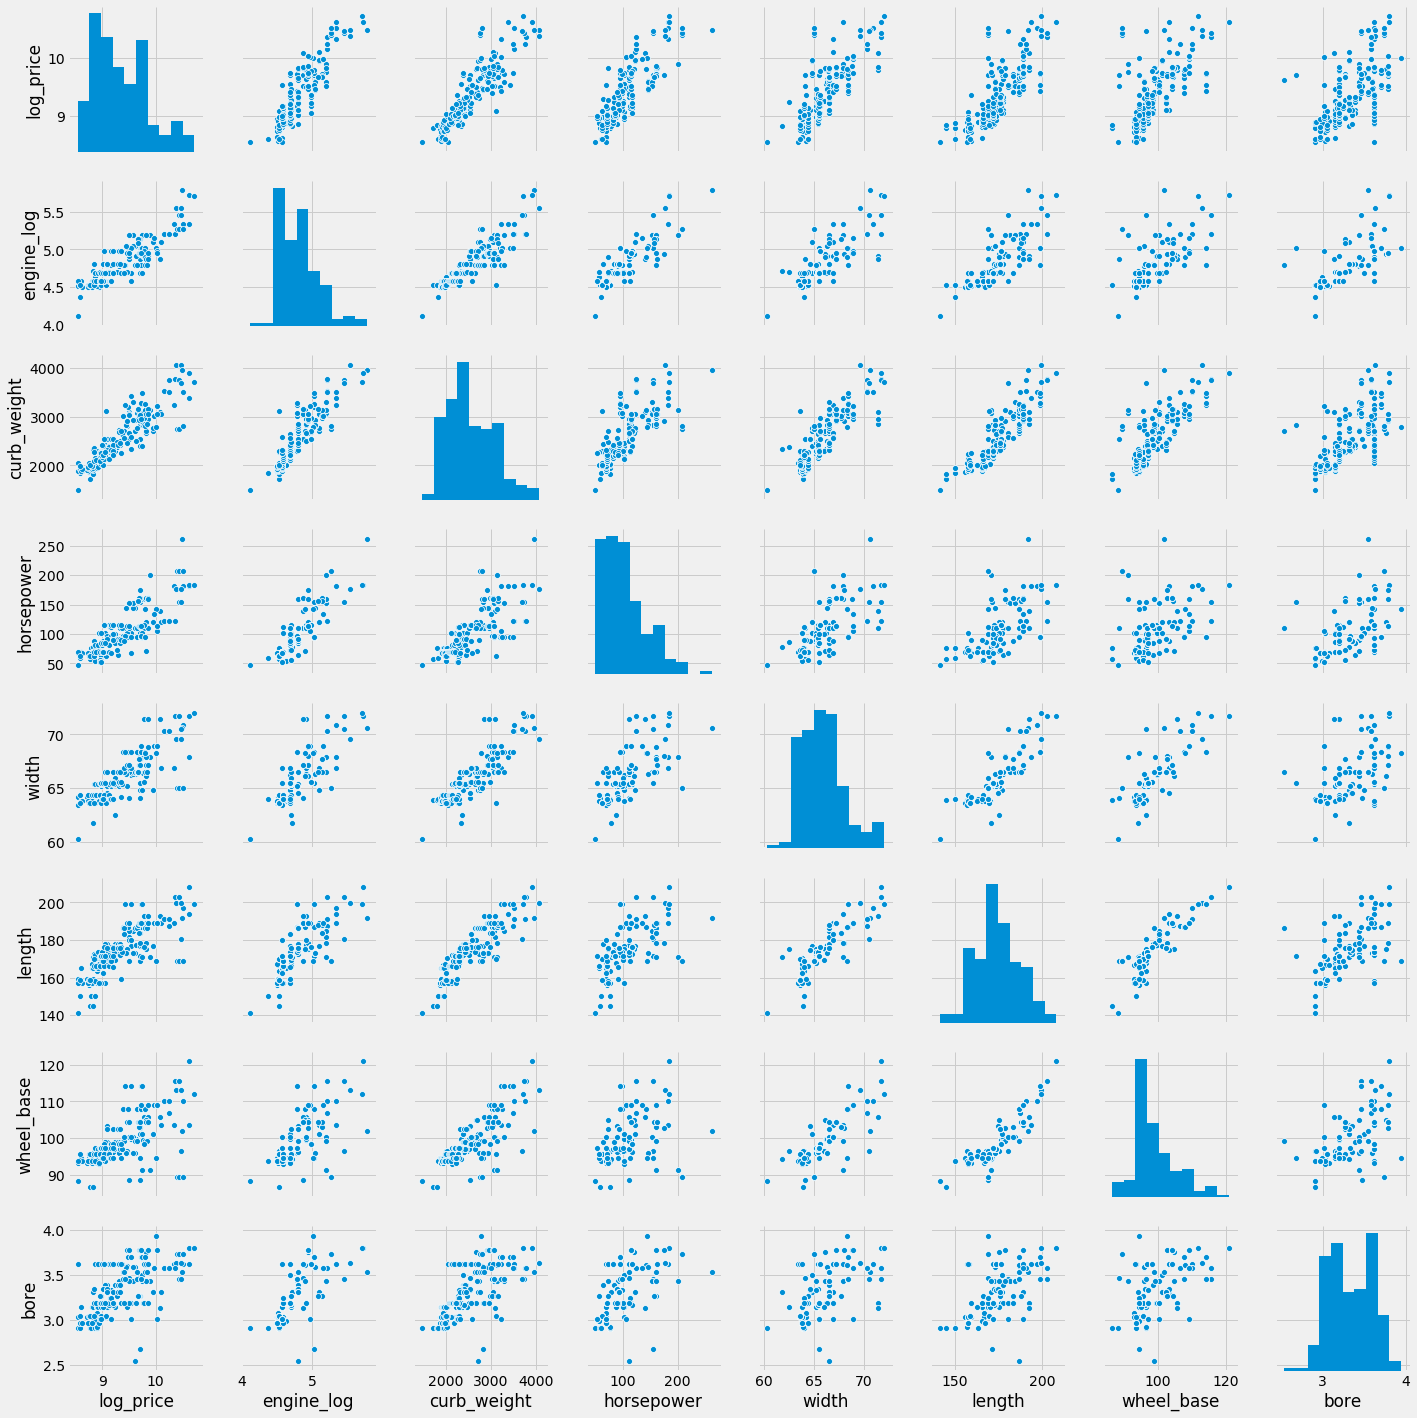

In [91]:
# STUDENT SECTION
#Let's try visualizing some of these pairwise correlations with seaborn
sns.pairplot(cars[['log_price','engine_log', 'curb_weight', 'horsepower', 'width', 'length', 'wheel_base','bore']])

#### What can we do with this observation?
##### Indicator (Dummy) Variables
As a first attempt, let's try to create [***indicator variables***](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) Indicator variables are 0/1 binary variables that indicate whether a condition is met or not, and they are quite useful in regression as they have an easy conceptual understanding: a value of 1 for a given field increases the target variable by the amount of its model coefficient.  These are often useful when provided with categorical attributes.  Any field with n unique categorical values can be reformulated into n indicator variable fields where each represents whether or not that attribute value is present.

Let's see how to transform a categorical variable into a dummy variable.

In [75]:
# Let's add 'make'
print(df.make.value_counts())
print('\n')
print(len(df.make.value_counts()))

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64


22


In [78]:
# use patsy to convert the feature 'make' to categorical variables

X=patsy.dmatrix('make',data=df,return_type='dataframe')
X.head()

# Q for Students: What do you notice about the returned matrix ?

,Intercept,make[T.audi],make[T.bmw],make[T.chevrolet],make[T.dodge],make[T.honda],make[T.isuzu],make[T.jaguar],make[T.mazda],make[T.mercedes-benz],...,make[T.nissan],make[T.peugot],make[T.plymouth],make[T.porsche],make[T.renault],make[T.saab],make[T.subaru],make[T.toyota],make[T.volkswagen],make[T.volvo]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Why are there three alfa romeos but more intercept 1 values?

In [79]:
# A:  A couple of things:  1) First of all, we've added an intercept (comes for free w/ patsy!)  
#  2) 2nd: our favorite 'make' ('alfo-romero' of course) is missing from the above matrix

## This is because patsy knows about (The Dummy Variable Trap)[http://www.algosome.com/articles/dummy-variable-trap-regression.html]
# The idea behind DVT: Take a categorical variable that has two outcomes (example: boy & girl for the feature 'sex) - 
# We only need one column: "Girl", we can obviously solve for 'Boy' given this column -- if we had 
# both columns, we would automatically introduce multicolinearity  -- this idea can be extended to categorical features with 
# 20+ categories ! 

In [93]:
# STUDENT SECTION
# Append the X 'make' matrix to your cars matrix.  Call your result cars2.

cars2=cars.join(X)
cars2.columns
## Cool thing to note: even though cars & X are different lengths (due to our previous .dropna()) ~ 
# joins allows us to 'merge' on their common index 

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price', 'engine_log', 'log_price',
       'Intercept', 'make[T.audi]', 'make[T.bmw]', 'make[T.chevrolet]',
       'make[T.dodge]', 'make[T.honda]', 'make[T.isuzu]', 'make[T.jaguar]',
       'make[T.mazda]', 'make[T.mercedes-benz]', 'make[T.mercury]',
       'make[T.mitsubishi]', 'make[T.nissan]', 'make[T.peugot]',
       'make[T.plymouth]', 'make[T.porsche]', 'make[T.renault]',
       'make[T.saab]', 'make[T.subaru]', 'make[T.toyota]',
       'make[T.volkswagen]', 'make[T.volvo]'],
      dtype='object')

In [94]:
## For fun, let's see a quick way to throw cars2 into a OLS model,

# sm (vs smf) allows for the following shortcut!
import statsmodels.api as sm

y = cars2.log_price
x = cars2.drop(['log_price', 'price'], 1)

lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

#  Looks like 'make' gives our R-squared a boost

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     99.94
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           5.49e-91
Time:                        06:56:26   Log-Likelihood:                 157.93
No. Observations:                 195   AIC:                            -245.9
Df Residuals:                     160   BIC:                            -131.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheel_base                0.0129      0.005      2.439      0.016       0.002       0.023
length                   -0.0007      0.003     -0.271      0.787      -0.006       0.005
width                    -0.0065      0.013     -0.481      0.631      -0.033       0.020
height                   -0.0299      0.007     -4.013      0.000      -0.045      -0.015
curb_weight               0.0006   8.47e-05      6.658      0.000       0.000       0.001
engine_size               0.0016      0.002      0.843      0.400      -0.002       0.005
bore                      0.0095      0.069      0.138      0.890      -0.126       0.145
stroke                    0.0128      0.055      0.234      0.816      -0.095       0.121
compression-ratio         0.0074      0.004      1.943      0.054      -0.000       0.015
horsepower                0.0028      0.001      3.189      0.002       0.001       0.004
peak-rpm              -2.381e-05   3.48e-05     -0.685      0.495   -9.25e-05    4.49e-05
city-mpg                 -0.0161      0.009     -1.881      0.062      -0.033       0.001
highway-mpg               0.0087      0.007      1.217      0.226      -0.005       0.023
engine_log               -0.3715      0.317     -1.173      0.242      -0.997       0.254
Intercept                10.3592      1.521      6.811      0.000       7.356      13.363
make[T.audi]              0.1234      0.107      1.155      0.250      -0.088       0.334
make[T.bmw]               0.2867      0.093      3.083      0.002       0.103       0.470
make[T.chevrolet]        -0.2056      0.121     -1.693      0.092      -0.445       0.034
make[T.dodge]            -0.3292      0.095     -3.470      0.001      -0.516      -0.142
make[T.honda]            -0.1542      0.099     -1.553      0.123      -0.350       0.042
make[T.isuzu]            -0.3940      0.115     -3.428      0.001      -0.621      -0.167
make[T.jaguar]           -0.3571      0.153     -2.339      0.021      -0.659      -0.056
make[T.mazda]            -0.1191      0.090     -1.324      0.187      -0.297       0.059
make[T.mercedes-benz]     0.0673      0.123      0.547      0.585      -0.176       0.310
make[T.mercury]          -0.2021      0.161     -1.256      0.211      -0.520       0.116
make[T.mitsubishi]       -0.3839      0.089     -4.317      0.000      -0.560      -0.208
make[T.nissan]           -0.2067      0.085     -2.432      0.016      -0.375      -0.039
make[T.peugot]           -0.2832      0.110     -2.572      0.011      -0.501      -0.066
make[T.plymouth]         -0.3467      0.095     -3.632      0.000      -0.535      -0.158
make[T.porsche]           0.4856      0.112      4.340      0.000       0.265       0.707
make[T.renault]        2.439e-15   3.45e-16      7.073      0.000    1.76e-15    3.12e-15
make[T.saab]           

In [ ]:
#  And this is just the beginning !
## We'll pick up where we left off here soon :)

# we can pickle our dataframe:
cars2.to_pickle('data/cars_dataframe.pkl')



## What have we done?
- Learned how to use statsmodels with R formula syntax for creating linear models
- Learned how to evaluate models using adjusted R^2
- Understood linear and polynomial regression in sklearn
- Used seaborn for visualizing relationships in data
- Used pandas for manipulating data as we move through our workflow
- Gotten a peak into a genuine data science workflow
- Seen how curiosity and creativity can yield big gains in a data science modeling pipeline

## Play Time
See if you can improve the model by trying out whatever methods you like!  